#**Noise Reduction with Autoencoders**

In [1]:
print("By Ryan Ho, Andrew Chen, Junkai Zheng")

By Ryan Ho, Andrew Chen, Junkai Zheng


**Importing introductory libraries and modules for project configuration**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as fm
import numpy

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.layers import Conv2DTranspose, Input, Conv2D

In [5]:
(xtrain, _), (xtest, __) = fm.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print("Max xtrain value: ", xtrain[0].max())
print("Minimum xtrain value: ", xtrain[0].min())

Max xtrain value:  255
Minimum xtrain value:  0


*** Create a plot of images from fasion_mnist library ***
>  Using two for-loops to traverse through image library.


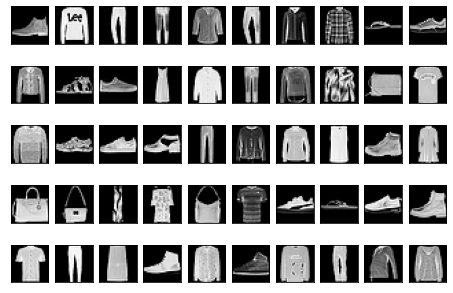

In [7]:
fig, axs = plt.subplots(5, 10)
fig.tight_layout(pad = -1)
plt.gray()
a = 0 
for i in range(5):
  for j in range(10):
    axs[i, j].imshow(tf.squeeze(xtest[a]))
    axs[i, j].xaxis.set_visible(False)
    axs[i, j].yaxis.set_visible(False)
    a += 1

**Processing the Fasion MNIST Data**


*   Apply [Minmax normalization](https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/fd5b8a44-e9d3-4c19-bebb-c2fa5a5ebfee.xhtml) to image data (limit value range between [0, 1]) 


> RGB values entail that minimum value is 0 and the maximum value is 255. 






In [8]:
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

# print(xtrain)
# print(xtest)
#nvm lol 

*** Reshape array to add a fourth column indicating grayscale vs color format ***


> Add a fourth column that serves the purpose of defining a greyscale vs color attribute. 



In [9]:
xtrain = xtrain[..., tf.newaxis]
xtest =  xtest[..., tf.newaxis]

In [10]:
print(xtrain.shape)

(60000, 28, 28, 1)


In [11]:
print(xtest.shape)

(10000, 28, 28, 1)


**Adding Noise to the trainer images**


> Use existing imgae data and add random noise to feed original images as input and noisy images as output


> To train the relationship between a normal image vs an image with noise.





In [12]:
noise = 0.45
#xtrain noise variable
xtrain_noise = xtrain + noise * tf.random.normal(shape = xtrain.shape)

#xtest noise variable
xtest_noise = xtest + noise * tf.random.normal(shape = xtest.shape)

Ensure that array items are within range [0, 1]. 

In [13]:
xtrain_noise = tf.clip_by_value(xtrain_noise, clip_value_min = 0, clip_value_max = 1)
xtest_noise = tf.clip_by_value(xtest_noise, clip_value_min = 0, clip_value_max = 1)

Display standard and noise-added datasets

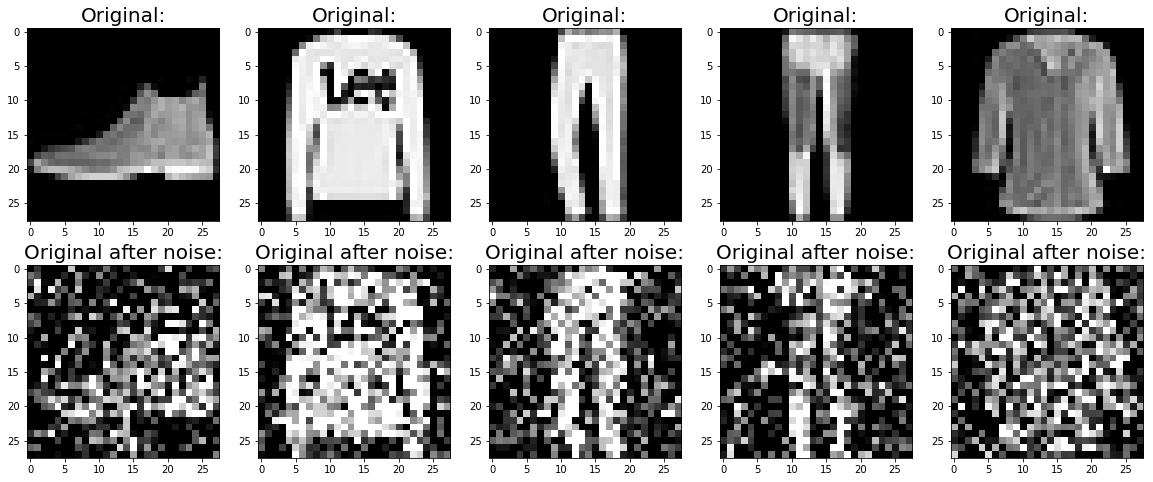

In [14]:
plt.figure(figsize = (20, 8))
plt.gray()

for i in range(5):
  x = plt.subplot(2, 5, i + 1)
  plt.title("Original:", size = 20)
  plt.imshow(tf.squeeze(xtest[i]))
  plt.gray()

  y = plt.subplot(2, 5, 6 + i)
  plt.title("Original after noise:", size = 20)
  plt.imshow(tf.squeeze(xtest_noise[i]))
plt.show()

#**Creating the function to call machine learning algorithm application**



1.   Created a class extending the keras.Model object
2.   Created an __init__ function to declare two separate models built with Sequential API. Within them, we needed to declare layers that would reverse each other. 
3. One Conv2D layer for the encoder model whereas one Conv2DTranspose layer for the decoder model.
4. Created a call function to tell the model how to process the inputs using the initialized variables with __init__ method
5. Called the initialized encoder model (images as input)
6. Call the initialized decoder model which takes the output of the encoder model (encoded) as input
7. Return the output of the encoder



In [15]:
class reduceNoise(tf.keras.Model):
  def __init__(self):
    super(reduceNoise, self).__init__()

    self.encoder = tf.keras.Sequential([
        Input(shape = (28, 28, 1)),
        Conv2D(16, (3, 3), activation = 'relu', padding = 'same', strides = 2),
        Conv2D(8, (3, 3), activation = 'relu', padding = 'same', strides = 2)
    ])

    self.decoder = tf.keras.Sequential([
        Conv2DTranspose(8, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),
        Conv2DTranspose(16, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),
        Conv2D(1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same')
    ])

  def call(self, x):
    encode = self.encoder(x)
    decode = self.decoder(encode)
    return decode

Model Creation:

In [16]:
autoencoder = reduceNoise()

Model Configuration (DO NOT TOUCH)
Optimizer: Adam & Mean Squared Error

In [17]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')

Deep Convolutional Autoencoder Training Performance
* Run model for 10 epochs through feeding noise induced and clean images
* Tested datasets for validation *italicized text*


In [18]:
autoencoder.fit(xtrain_noise, 
                xtrain, 
                epochs=10, 
                shuffle=True, 
                validation_data=(xtest_noise, xtest))

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.0277 - val_loss: 0.0190
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - val_loss: 0.0183
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0173 - val_loss: 0.0172
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0169 - val_loss: 0.0170
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0167 - val_loss: 0.0167
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0165 - val_loss: 0.0165
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

Reduce Iamge Noise with Trained Autoencoder

In [19]:
encodedimages = autoencoder.encoder(xtest_noise).numpy()
decodedimages = autoencoder.decoder(encodedimages)

Plot first 10 samples for comparison:


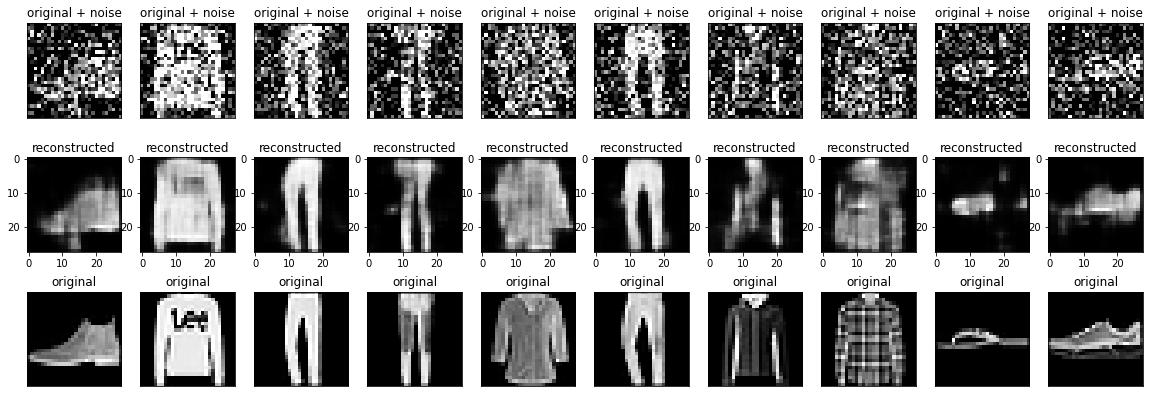

In [20]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # Display original images with noise 
  y = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(xtest_noise[i])) 
  x.get_xaxis().set_visible(False) 
  x.get_yaxis().set_visible(False) 
  
  # Display reconstruction of images with our ML model
  z = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decodedimages[i])) 
  y.get_xaxis().set_visible(False) 
  y.get_yaxis().set_visible(False) 
  
  # display original 
  x = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(xtest[i])) 
  x.get_xaxis().set_visible(False) 
  x.get_yaxis().set_visible(False) 

plt.show()